In [1]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
import numpy as np
import cmocean
import matplotlib.colors as mcolors
import sys
import geopandas as gpd
coastline = gpd.read_file('~/storage/VECTORIAL/cl_continental_geo.shp')
sys.path.append('../')
from utils import croco_sellonlatbox

In [2]:
regiones = gpd.read_file('~/storage/VECTORIAL/limites/Limite Regional/division_regional.shp').to_crs('epsg:4326')

In [3]:
gebco = xr.open_dataset('~/storage/GEBCO_2021_0.05x0.05.nc').sel(lon=slice(250,290), lat=slice(-45,-10))
gebco = -gebco.where(gebco.elevation<0)

---

In [4]:
def plot_bbox(ax,lonmin,lonmax,latmin,latmax, **kwargs):
    ax.plot([lonmin,lonmax,lonmax,lonmin,lonmin],
            [latmin,latmin,latmax,latmax,latmin],
            **kwargs)

In [5]:
ncchilegrid = xr.open_dataset('../ncchile_grd.nc')
ncchilegrid.coords['lat_rho'] = ncchilegrid.lat_rho
ncchilegrid.coords['lon_rho'] = ncchilegrid.lon_rho

rund0grid = xr.open_dataset('/home/lucasg/storage/SEQUIA/crocod0_grd.nc').load()
rund0grid.coords['lat_rho'] = rund0grid.lat_rho
rund0grid.coords['lon_rho'] = rund0grid.lon_rho

rund1grid = xr.open_dataset('/home/lucasg/storage/SEQUIA/crocod1_grd.nc').load()
rund1grid.coords['lat_rho'] = rund1grid.lat_rho
rund1grid.coords['lon_rho'] = rund1grid.lon_rho


/home/lucasg/miniconda3/envs/main/lib/python3.8/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/lucasg/miniconda3/envs/main/lib/python3.8/site-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/lucasg/miniconda3/envs/main/lib/python3.8/site-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/lucasg/m

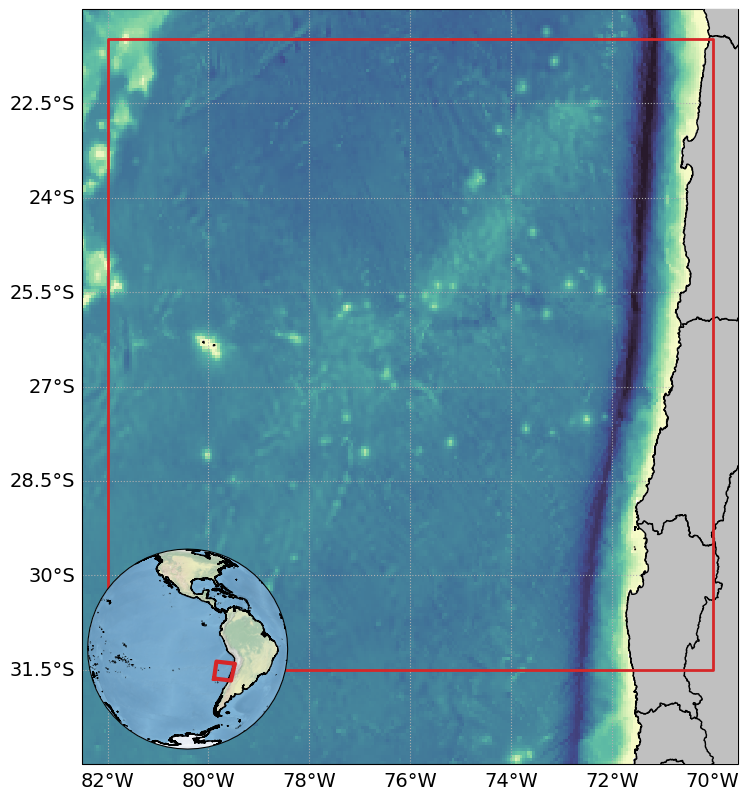

In [36]:
import matplotlib.patches as mpatches
fig = plt.figure(figsize=(10,10), facecolor='w', dpi=100)

plt.rc('font', size=14)
ax0 = fig.add_subplot(111, projection=ccrs.PlateCarree())
ax0.set_extent([-82.5,-69.5,-33,-21])
ax0.add_feature(cf.LAND, color='silver', zorder=10)
regiones.plot(ax=ax0, zorder=12, color='silver', edgecolor='k', transform=ccrs.PlateCarree())
gebco.elevation.plot(ax=ax0, add_colorbar=False, cmap=cmocean.cm.deep, transform=ccrs.PlateCarree(), vmin=0, vmax=7.5e3)
gl = ax0.gridlines(draw_labels=True, linestyle=":")
gl.right_labels = False
gl.top_labels   = False
ax0.set_ylabel('Latitud (°)')
ax0.set_xlabel('Longitud (°)')
# ax0.set_yticks(np.arange(-33,-28,1))

ax1 = fig.add_axes([0.19,0.13,0.2,0.22], projection=ccrs.Orthographic(central_longitude=-100, central_latitude=-15))
ax1.coastlines('10m')
ax1.stock_img()
plot_bbox(ax1,-82,-69.5,-31.5,-21.5, transform=ccrs.Geodetic(), color='tab:red', lw=3)



plot_bbox(ax0, ncchilegrid.lon_rho.min().item(), ncchilegrid.lon_rho.max().item(), ncchilegrid.lat_rho.min().item(), ncchilegrid.lat_rho.max().item(),
          zorder=20, transform=ccrs.Geodetic(), color='tab:red', lw=2)
# plot_bbox(ax0, rund0grid.lon_rho.min().item(), rund0grid.lon_rho.max().item(), rund0grid.lat_rho.min().item(), rund0grid.lat_rho.max().item(), zorder=20, transform=ccrs.Geodetic(), color='tab:red')
# (ncchilegrid.hraw<0).where(ncchilegrid.hraw<0).plot(x='lon_rho', y='lat_rho', ax=ax0, add_colorbar=False, cmap='bone_r')

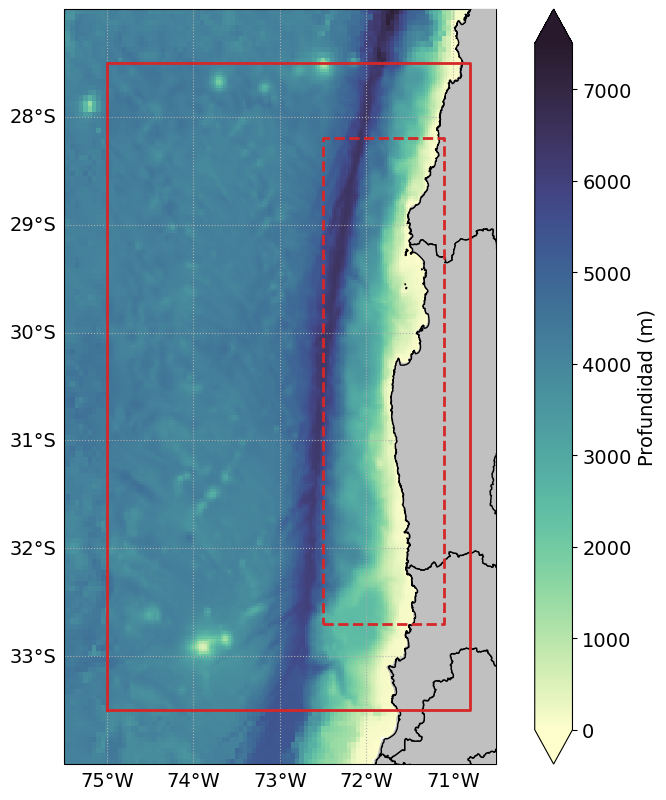

In [43]:
fig = plt.figure(figsize=(10,10), facecolor='w', dpi=100)
plt.rc('font', size=14)
ax0 = fig.add_subplot(111, projection=ccrs.PlateCarree())
ax0.set_extent([284.5,289.5,-34.0,-27])
ax0.add_feature(cf.LAND, color='silver', zorder=10)
regiones.plot(ax=ax0, zorder=12, color='silver', edgecolor='k', transform=ccrs.PlateCarree())

gebco.elevation.plot(ax=ax0, add_colorbar=False, cmap=cmocean.cm.deep, transform=ccrs.PlateCarree(), vmin=0, vmax=7.5e3)
rund0grid.hraw.plot(ax=ax0, x='lon_rho', y='lat_rho', cmap=cmocean.cm.deep, transform=ccrs.PlateCarree(), vmin=7.5e3, vmax=0, cbar_kwargs={'label':'Profundidad (m)'})
gl = ax0.gridlines(draw_labels=True, linestyle=":")
gl.right_labels = False
gl.top_labels   = False
ax0.set_ylabel('Latitud (°)')
ax0.set_xlabel('Longitud (°)')
# ax0.set_yticks(np.arange(-33,-28,1))

plot_bbox(ax0, rund0grid.lon_rho.min().item(), rund0grid.lon_rho.max().item(), rund0grid.lat_rho.min().item(), rund0grid.lat_rho.max().item(), zorder=20, transform=ccrs.Geodetic(), color='tab:red', lw=2)
plot_bbox(ax0, rund1grid.lon_rho.min().item(), rund1grid.lon_rho.max().item(), rund1grid.lat_rho.min().item(), rund1grid.lat_rho.max().item(), zorder=20, transform=ccrs.PlateCarree(), color='tab:red', lw=2, ls="--")
# (ncchilegrid.hraw<0).where(ncchilegrid.hraw<0).plot(x='lon_rho', y='lat_rho', ax=ax0, add_colorbar=False, cmap='bone_r')

---

# Rivers positions RUND0

<xarray.Dataset>
Dimensions:    (one: 1, eta_rho: 252, xi_rho: 152, bath: 1, eta_u: 252,
                xi_u: 151, eta_v: 251, xi_v: 152, eta_psi: 251, xi_psi: 151)
Coordinates:
    lon_rho    (eta_rho, xi_rho) float64 285.0 285.0 285.1 ... 289.1 289.2 289.2
    lat_rho    (eta_rho, xi_rho) float64 -33.5 -33.5 -33.5 ... -27.5 -27.5 -27.5
Dimensions without coordinates: one, eta_rho, xi_rho, bath, eta_u, xi_u, eta_v,
                                xi_v, eta_psi, xi_psi
Data variables: (12/32)
    xl         (one) float64 9.969e+36
    el         (one) float64 9.969e+36
    depthmin   (one) float64 9.969e+36
    depthmax   (one) float64 9.969e+36
    spherical  (one) |S1 b'T'
    angle      (eta_rho, xi_rho) float64 -0.0001338 -0.0001338 ... -0.0001119
    ...         ...
    lat_v      (eta_v, xi_v) float64 -33.49 -33.49 -33.49 ... -27.51 -27.51
    lat_psi    (eta_psi, xi_psi) float64 -33.49 -33.49 -33.49 ... -27.51 -27.51
    mask_rho   (eta_rho, xi_rho) float64 1.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0
    mask_u     (eta_u, xi_u) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 0.0 0.0 0.0 0.0
    mask_v     (eta_v, xi_v) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 0.0 0.0 0.0 0.0
    mask_psi   (eta_psi, xi_psi) float64 1.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0
Attributes:
    title:    DESALADORAS_D0
    date:     08-Mar-2023
    type:     CROCO grid file

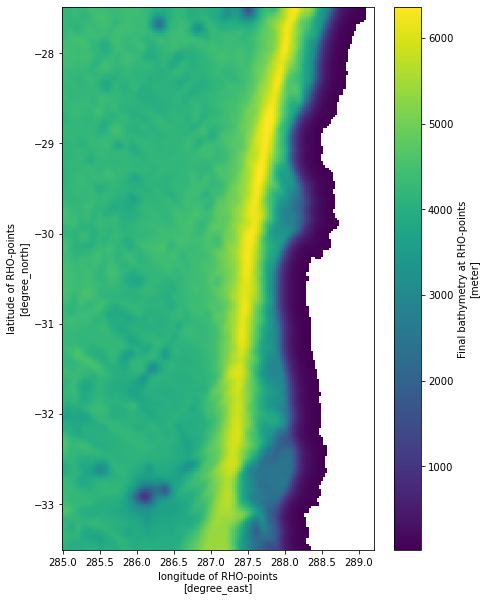

In [ ]:
rund0grid.h.where(rund0grid.mask_rho).plot(figsize=(7,10), x='lon_rho', y='lat_rho')

In [ ]:
r1 = (-30,360-71.4168) #panul
# r1 = (-29.489,360-71.326) #totoralillo norte
# r1 = (-31.892,360-71.506) #losivlos
latp,lonp = rund0grid.lat_psi, rund0grid.lon_psi
poslat = np.min(np.where((latp[:,0]>=r1[0]-1/36)&(latp[:,0]<=r1[0]+1/36))[0])
poslon = np.min(np.where(lonp[poslat,:]-r1[1]>0)[0])
print(poslat,poslon)

147 129


---

## Rivers positions RUND1

In [ ]:

rund1grid

NameError: name 'rund1grid' is not defined

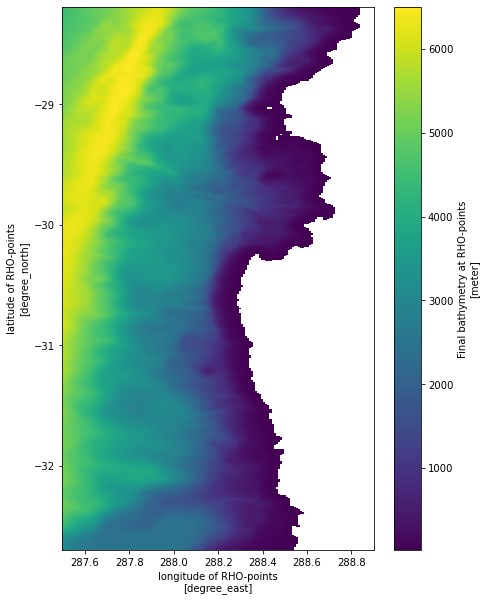

In [ ]:
rund1grid.h.where(rund1grid.mask_rho).plot(figsize=(7,10), x='lon_rho', y='lat_rho')

In [ ]:
# r1 = (-30,360-71.4168) #panul
# r1 = (-29.489,360-71.326) #totoralillo norte
r1 = (-31.892,360-71.506) #losivlos
latp,lonp = rund1grid.lat_psi, rund1grid.lon_psi
poslat = np.min(np.where((latp[:,0]>=r1[0]-1/36/3)&(latp[:,0]<=r1[0]+1/36/3))[0])
poslon = np.min(np.where(lonp[poslat,:]-r1[1]>0)[0])
print(poslat,poslon)

102 107


---

In [ ]:
rund0grid.lon_u[68,125]-360,rund0grid.lat_u[68,125]

(<xarray.DataArray 'lon_u' ()>
 array(-71.51388889),
 <xarray.DataArray 'lat_u' ()>
 array(-31.91087763)
 Attributes:
     long_name:  latitude of U-points
     units:      degree_north)

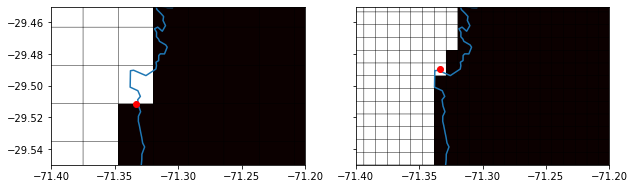

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(10,15), sharex=True,sharey=True)


for axis in ax.ravel():
    coastline.boundary.plot(ax=axis, color='tab:blue')    
    axis.set_xlim(-71.4,-71.2)
    axis.set_ylim(-29.55,-29.45)

ax[0].pcolormesh(rund0grid.lon_rho-360, rund0grid.lat_rho, rund0grid.mask_rho, alpha=1, cmap='hot')
ax[0].pcolor(rund0grid.lon_rho-360, rund0grid.lat_rho, rund0grid.mask_rho, facecolor='none', edgecolor='k')
ax[0].scatter(rund0grid.lon_u[147,129]-360,rund0grid.lat_u[147,129], color='red',zorder=3) # Panul
ax[0].scatter(rund0grid.lon_v[168,132]-360,rund0grid.lat_v[168,132], color='red',zorder=3) # Totoralillo norte
ax[0].scatter(rund0grid.lon_u[68,125]-360,rund0grid.lat_u[68,125], color='red',zorder=3)   # Los Vilos

ax[1].pcolormesh(rund1grid.lon_rho-360, rund1grid.lat_rho, rund1grid.mask_rho, alpha=1, cmap='hot')
ax[1].pcolor(rund1grid.lon_rho-360, rund1grid.lat_rho, rund1grid.mask_rho, facecolor='none', edgecolor='k')



ax[1].scatter(rund1grid.lon_rho.sel(eta_rho=340,xi_rho=117)-360,rund1grid.lat_rho.sel(eta_rho=340,xi_rho=117), color='red',zorder=3)   # Panul
ax[1].scatter(rund1grid.lon_rho.sel(eta_rho=405,xi_rho=126)-360,rund1grid.lat_rho.sel(eta_rho=405,xi_rho=126), color='red',zorder=3)   # Totoralillo norte
ax[1].scatter(rund1grid.lon_rho.sel(eta_rho=104,xi_rho=107)-360,rund1grid.lat_rho.sel(eta_rho=104,xi_rho=107), color='red',zorder=3)   # Los Vilos




#PARAMETERS TO crocod0_inter.in
# psource:   Nsrc  Isrc  Jsrc  Dsrc  Qbar [m3/s]    Lsrc        Tsrc
#             3
# 		  130   147     0   -1.3333            F T      20. 60.
# 		  132   169     1    1.3333            F T      20. 60.
# 		  126    68     0   -1.3333            F T      20. 60.



#PARAMETERS TO crocod1_inter.in
# psource:   Nsrc  Isrc  Jsrc  Dsrc  Qbar [m3/s]    Lsrc        Tsrc
#             3
# 		  118   340     0   -1.3333            F T      20. 60.
# 		  126   405     0   -1.3333            F T      20. 60.
# 		  108   104     1    1.3333            F T      20. 60.

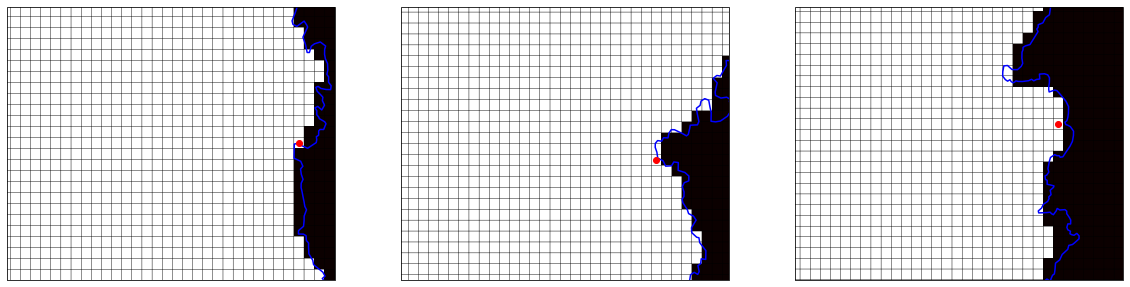

In [ ]:
fig, ax = plt.subplots(1,3, subplot_kw={'projection':ccrs.PlateCarree()}, figsize=(20,10))
points     = [(-29.49, 360-71.4),(-30, 360-71.45),(-31.9, 360-71.55)]
lonoffsets = -0.2,0.1
latoffsets = -0.1,0.1
titles = ['Totoralillo Norte', 'El Panul', 'Los Vilos']
for i, axis in enumerate(ax.ravel()):
    p = points[i]
    lonmin,lonmax=p[1]+lonoffsets[0],p[1]+lonoffsets[1]
    latmin,latmax=p[0]+latoffsets[0],p[0]+latoffsets[1]
    axis.set_extent([lonmin,lonmax,latmin,latmax])
    coastline.boundary.plot(ax=axis, edgecolor='blue',zorder=2)
    
        
    axis.pcolormesh(rund1grid.lon_rho-360, rund1grid.lat_rho, rund1grid.mask_rho, alpha=1, cmap='hot')
    axis.pcolor(rund1grid.lon_rho-360, rund1grid.lat_rho, rund1grid.mask_rho, facecolor='none', edgecolor='k')

    axis.scatter(rund1grid.lon_rho.sel(eta_rho=340,xi_rho=117)-360,rund1grid.lat_rho.sel(eta_rho=340,xi_rho=117), color='red',zorder=3)   # Panul
    axis.scatter(rund1grid.lon_rho.sel(eta_rho=405,xi_rho=126)-360,rund1grid.lat_rho.sel(eta_rho=405,xi_rho=126), color='red',zorder=3)   # Totoralillo norte
    axis.scatter(rund1grid.lon_rho.sel(eta_rho=104,xi_rho=107)-360,rund1grid.lat_rho.sel(eta_rho=104,xi_rho=107), color='red',zorder=3)   # Los Vilos

